In [ ]:
   import tensorflow as tf
   from tensorflow.keras import datasets, layers, models
   import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0


In [ ]:
model = models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.Flatten(),
layers.Dense(64, activation='relu'),
layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels))


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 37ms/step - accuracy: 0.8062 - loss: 0.5273 - val_accuracy: 0.8499 - val_loss: 0.4076
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 34ms/step - accuracy: 0.8795 - loss: 0.3294 - val_accuracy: 0.8873 - val_loss: 0.3131
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8958 - loss: 0.2813 - val_accuracy: 0.8931 - val_loss: 0.2951


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8950 - loss: 0.2991
Test Accuracy: 0.8931000232696533


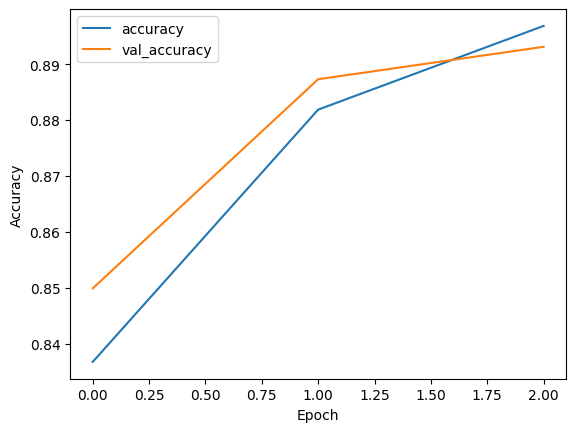

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Sequence model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7717 - loss: 0.6539 - val_accuracy: 0.8304 - val_loss: 0.4526
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8557 - loss: 0.4008 - val_accuracy: 0.8660 - val_loss: 0.3762
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8713 - loss: 0.3559 - val_accuracy: 0.8652 - val_loss: 0.3721
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8799 - loss: 0.3272 - val_accuracy: 0.8723 - val_loss: 0.3490
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8887 - loss: 0.3046 - val_accuracy: 0.8784 - val_loss: 0.3332
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8706 - loss: 0.3552


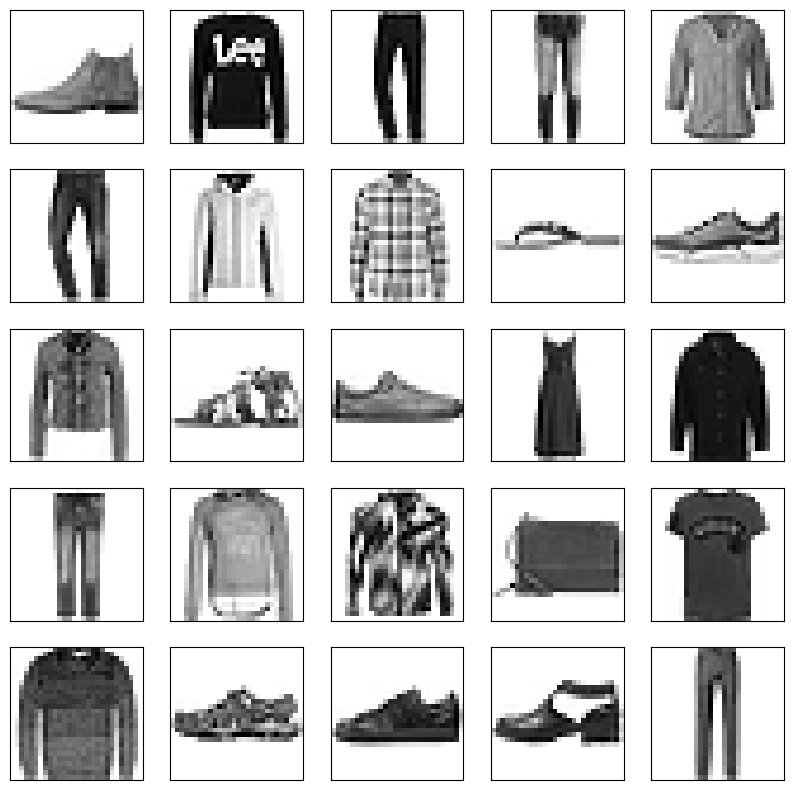

Test Accuracy: 86.64%


In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)


plt.figure(figsize=(10, 10))
for i in range(25):
          plt.subplot(5, 5, i + 1)
          plt.xticks([])
          plt.yticks([])
          plt.grid(False)
          plt.imshow(X_test[i], cmap=plt.cm.binary)
plt.show()

print(f'Test Accuracy: {accuracy*100:.2f}%')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7755 - loss: 0.6509 - val_accuracy: 0.8327 - val_loss: 0.4750
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8570 - loss: 0.4006 - val_accuracy: 0.8618 - val_loss: 0.4110
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8727 - loss: 0.3513 - val_accuracy: 0.8692 - val_loss: 0.3697
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8775 - loss: 0.3323 - val_accuracy: 0.8690 - val_loss: 0.3682
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8866 - loss: 0.3049 - val_accuracy: 0.8765 - val_loss: 0.3391
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8908 - loss: 0.2935 - val_accuracy: 0.8811 - val_loss: 0.3305
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8984 - loss: 0.2721 - val_accuracy: 0.8780 - val_loss: 0.3451
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9003 - loss: 0.2686 

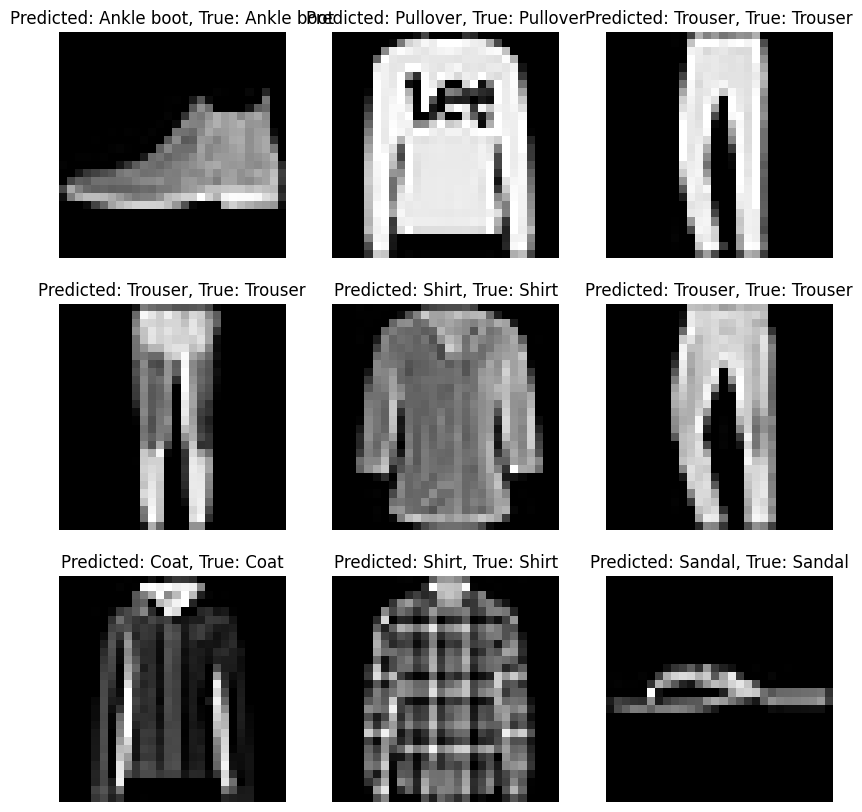

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the ANN model
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_onehot, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)
print(f"ANN Test accuracy: {test_accuracy:.4f}")

# Make predictions
predictions = model.predict(x_test)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
# Define the labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plot some images with predictions and labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {labels[predicted_classes[i]]}, True: {labels[y_test[i]]}")
    plt.axis('off')
plt.show()




In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)    # Add channel dimension

# Convert labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)



In [ ]:
# Define a basic block for ResNet
def resnet_block(x, filters):
    shortcut = x
    x = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.add([x, shortcut])  # Skip connection
    x = tf.keras.layers.ReLU()(x)
    return x



In [ ]:
# Build the ResNet model
def create_resnet(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)

                    # Add several residual blocks
    for _ in range(3):
        x = resnet_block(x, 32)
        x = tf.keras.layers.GlobalAveragePooling2D()(x)
        x = tf.keras.layers.Dense(10, activation='softmax')(x)
        model = tf.keras.Model(inputs=inputs, outputs=x)
        return model


In [ ]:
# Create the model
model = create_resnet(input_shape=(28, 28, 1))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_onehot, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)
print(f"ResNet Test accuracy: {test_accuracy:.4f}")

# Make predictions
predictions = model.predict(x_test)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)
# Define the labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

          # Plot some images with predictions and labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {labels[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 230s 151ms/step - accuracy: 0.6096 - loss: 1.2775 - val_accuracy: 0.7002 - val_loss: 0.8027
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 262s 152ms/step - accuracy: 0.7849 - loss: 0.6254 - val_accuracy: 0.5374 - val_loss: 1.4159
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 261s 151ms/step - accuracy: 0.8106 - loss: 0.5367 - val_accuracy: 0.4097 - val_loss: 2.0839
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 262s 151ms/step - accuracy: 0.8302 - loss: 0.4866 - val_accuracy: 0.8093 - val_loss: 0.5379
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 272s 158ms/step - accuracy: 0.8386 - loss: 0.4587 - val_accuracy: 0.5944 - val_loss: 1.3222
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 225s 150ms/step - accuracy: 0.8462 - loss: 0.4333 - val_accuracy: 0.7116 - val_loss: 0.7837
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 263s 151ms/step - accuracy: 0.8584 - loss: 0.4030 - val_accuracy: 0.7285 - val_loss: 0.7928
Epoch 8/10
